## Sudoku Solver Main
                                                                                                By: Arsh D. Vijay
---------------------

### Importing Libraries

In [1]:
%run Sudoku_Solver.ipynb 
%run Utility_Functions.ipynb
%matplotlib inline
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt



### Initialization

In [2]:
#definig some basic properties
pathImg = 'Image/test.jpg' # Test 1
model = load_model('model/digit_recog.h5')

# Taken as 9*28 Since our model is trained on 64x64 img
ImgHeight =  288
ImgWidth = 288

### Load Sudoku Image

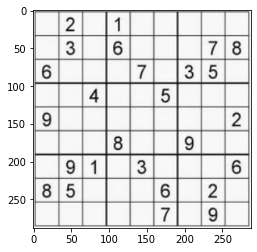

In [3]:
Img_raw = cv2.imread(pathImg)
Img = cv2.resize(Img_raw, (ImgHeight,ImgWidth))

# Previewing Test Image
plt.imshow(Img)


### Finding Contour's in Image

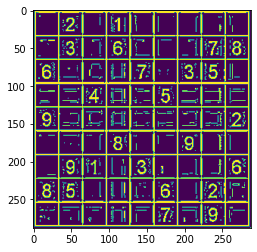

In [4]:
# Preparing Image for Countour Search
Img_processed  = Img.copy()
Img_processed = pre_processed(Img_processed)

# Preview

# OpenCV:
# cv2.imshow('Img',Img_processed)
# cv2.waitKey(0)

# Matplotlib: 
plt.imshow(Img_processed)


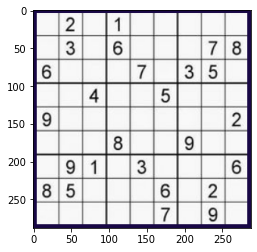

In [5]:
# Finding Contours
contour, hierarchy =  cv2.findContours(Img_processed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Drawing Founded Contours
img_contour = Img.copy()
cv2.drawContours(img_contour, contour, -1, (24,7,69),3)

# Preview

# Opencv:
# cv2.imshow('Contour',img_contour)
# cv2.waitKey(0)

# Matplotlib:
plt.imshow(img_contour)

### Extracting Sudoku from Image

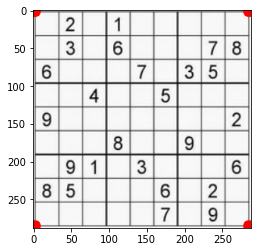

In [6]:
# Find biggest contour

img_big_contour = Img.copy()
biggest, maxArea = biggest_contour(contour)
if biggest.size != 0:
    biggest = reorder(biggest) # to arrange the corners point 
    cv2.drawContours(img_big_contour, biggest, -1 , (255,0,0), 15) #draw conners of biggest contour found with red color
    plt.imshow(img_big_contour)
    pts1 = np.float32(biggest)
    pts2 = np.float32([[0,0],[ImgWidth,0],[ImgWidth,ImgHeight],[0,ImgHeight]])
    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    warped_img = cv2.warpPerspective(Img, matrix, (ImgWidth,ImgHeight))

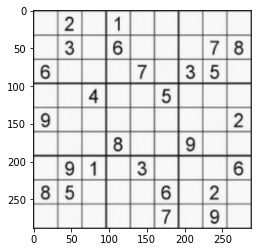

In [7]:
#Preview of Warped Image

# Opencv:
# cv2.imshow('Warped_img',warped_img)
# cv2.waitKey(0)   

# Matplotlib:
plt.imshow(warped_img)

### Seprating each boxes of Sudoku

In [8]:
# dividing sudoku in seprate boxes to run our ml model

boxes = split_boxes(warped_img)
print("Image has been successfully segregated in",len(boxes), "blocks") #checking our division

Image has been successfully segregated in 81 blocks


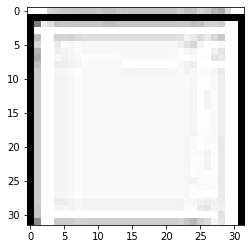

In [9]:
# Previewing sample box
box = boxes[2]
# Opencv:
# cv2.imshow('block',box)
# cv2.waitKey(0)

# Matplotlib:
plt.imshow(box)

### Checking our loaded Model

In [10]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_16 (Dense)             (None, 84)               

### Predicting Sudoku Digits

In [11]:

number = get_pred(boxes,model)

1 0 0.907629
2 2 0.99884653
3 0 0.92029583
4 1 0.77379435
5 0 0.94584304
6 0 0.94407576
7 0 0.93330014
8 0 0.9165889
9 0 0.92107785
10 0 0.959437
11 3 0.9389939
12 0 0.96735895
13 6 0.8824044
14 0 0.975293
15 0 0.9704695
16 0 0.968889
17 7 0.9291914
18 8 0.75183475
19 6 0.95777714
20 0 0.97437525
21 0 0.97879773
22 0 0.97142416
23 7 0.97754806
24 0 0.98386335
25 3 0.98501945
26 5 0.9968303
27 0 0.97630227
28 0 0.9862135
29 0 0.98628926
30 4 0.9906956
31 0 0.9874421
32 0 0.9851114
33 5 0.9967248
34 0 0.98632413
35 0 0.9866105
36 0 0.9872327
37 9 0.97837013
38 0 0.9806004
39 0 0.983125
40 0 0.98450696
41 0 0.9885705
42 0 0.9825851
43 0 0.98285276
44 0 0.97556746
45 2 0.9995659
46 0 0.99275315
47 0 0.99143183
48 0 0.9925311
49 8 0.9186712
50 0 0.99560416
51 0 0.99391246
52 9 0.9853616
53 0 0.9922076
54 0 0.99421614
55 0 0.9941432
56 9 0.9660438
57 1 0.99232894
58 0 0.99352103
59 3 0.9436737
60 0 0.99422544
61 0 0.9947693
62 0 0.993793
63 6 0.9317255
64 8 0.9816684
65 5 0.99419594
66 0 0.9

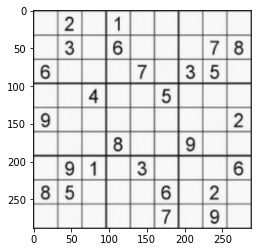

In [12]:
# Expected Result
plt.imshow(warped_img)

In [13]:
nu = np.array(number)
grid = nu.reshape(9,9)
print("Predicted Sudoku :")
print("\n")
Print_Board(grid)


Predicted Sudoku :


0 2 0 | 1 0 0 | 0 0 0 |
0 3 0 | 6 0 0 | 0 7 8 |
6 0 0 | 0 7 0 | 3 5 0 |
-----------------------
0 0 4 | 0 0 5 | 0 0 0 |
9 0 0 | 0 0 0 | 0 0 2 |
0 0 0 | 8 0 0 | 9 0 0 |
-----------------------
0 9 1 | 0 3 0 | 0 0 6 |
8 5 0 | 0 0 6 | 0 2 0 |
0 0 0 | 0 0 7 | 0 9 0 |




### Solving Sudoku

In [14]:
if solve(grid):
    print('Solution Found!!!')
    Print_Board(grid)

Solution Found!!!
7 2 8 | 1 5 3 | 6 4 9 |
1 3 5 | 6 4 9 | 2 7 8 |
6 4 9 | 2 7 8 | 3 5 1 |
-----------------------
2 1 4 | 3 9 5 | 8 6 7 |
9 8 3 | 7 6 4 | 5 1 2 |
5 7 6 | 8 2 1 | 9 3 4 |
-----------------------
4 9 1 | 5 3 2 | 7 8 6 |
8 5 7 | 9 1 6 | 4 2 3 |
3 6 2 | 4 8 7 | 1 9 5 |


